# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
y = df.list_price
X = df.drop(['list_price'], axis=1)

In [4]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [6]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 1200.776735764538
Test Mean Squarred Error: 1302.8963351232394


In [7]:
df.columns = df.columns.str.replace("[-]", "_")
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10_14',
       'ages_10_16', 'ages_10_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [8]:
df.columns = df.columns.str.replace("'","")
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10_14',
       'ages_10_16', 'ages_10_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [9]:
df.columns = df.columns.str.replace(u"\u2122","")
df.columns = df.columns.str.replace(u"\u00ae","")
df.columns = df.columns.str.replace("½","_and_a_half")
df.columns = df.columns.str.replace("[+]", "_and_above")
df.columns = df.columns.str.replace("[.]", "")

In [10]:
df.columns = df.columns.str.replace(" ", "_")

In [11]:
x_col = list(df.columns.drop(['list_price']))
outcome = 'list_price'
x_col

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10_and_above',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12_and_above',
 'ages_12_16',
 'ages_14_and_above',
 'ages_16_and_above',
 'ages_1_and_a_half_3',
 'ages_1_and_a_half_5',
 'ages_2_5',
 'ages_4_and_above',
 'ages_4_7',
 'ages_4_99',
 'ages_5_and_above',
 'ages_5_12',
 'ages_5_8',
 'ages_6_and_above',
 'ages_6_12',
 'ages_6_14',
 'ages_7_and_above',
 'ages_7_12',
 'ages_7_14',
 'ages_8_and_above',
 'ages_8_12',
 'ages_8_14',
 'ages_9_and_above',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMEN

In [12]:
predictors = '+'.join(x_col)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:49:21   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10_and_above                                  122.9923      5.753     21.378      0.000     111.715     134.270
ages_10_14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10_16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10_21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11_16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12_and_above                                   70.5837      4.828     14.619      0.000      61.119      80.048
ages_12_16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14_and_above                                   24.6493      3.579      6.887      0.000      17.634      31.665
ages_16_and_above                                   32.9512      5.251      6.275      0.000      22.658      43.245
ages_1_and_a_half_3                                 -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1_and_a_half_5                                 -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2_5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4_and_above                                   -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4_7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4_99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5_and_above                                    -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5_12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [13]:
model.pvalues[4]

0.019785379322774917

In [14]:
len(x_col)

102

In [35]:
list(model.params.index[:])

['Intercept',
 'piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10_and_above',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12_and_above',
 'ages_12_16',
 'ages_14_and_above',
 'ages_16_and_above',
 'ages_1_and_a_half_3',
 'ages_1_and_a_half_5',
 'ages_4_and_above',
 'ages_4_7',
 'ages_4_99',
 'ages_5_12',
 'ages_5_8',
 'ages_6_12',
 'ages_6_14',
 'ages_7_14',
 'ages_8_and_above',
 'ages_8_12',
 'ages_8_14',
 'ages_9_and_above',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DUPLO',
 'theme_name_Disney',
 'theme_name_Elves',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Juniors',
 'theme_name_MINDS

In [38]:
features = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features.append(model.params.index[i])
    
len(features)

53

In [39]:
predictors = '+'.join(features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     975.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:03:34   Log-Likelihood:                -55438.
No. Observations:               10870   AIC:                         1.110e+05
Df Residuals:                   10817   BIC:                         1.114e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           88.5172      1.759     50.326      0.000      85.069      91.965
piece_count                                         98.5478      0.690    142.738      0.000      97.194      99.901
num_reviews                                          7.3783      0.654     11.279      0.000       6.096       8.661
play_star_rating                                     4.4321      0.596      7.438      0.000       3.264       5.600
star_rating                                         -1.1546      0.671     -1.720      0.085      -2.470       0.161
val_star_rating                                    -10.4237      0.599    -17.395      0.000     -11.598      -9.249
ages_10_and_above                                   79.7515      6.607     12.071      0.000      66.801      92.702
ages_10_16                                         -34.5816      3.706     -9.331      0.000     -41.847     -27.317
ages_10_21                                          13.7429      7.271      1.890      0.059      -0.510      27.996
ages_11_16                                         -76.0831      5.330    -14.274      0.000     -86.531     -65.635
ages_12_and_above                                  -33.4248      3.026    -11.045      0.000     -39.357     -27.493
ages_12_16                                        -125.1031      6.729    -18.591      0.000    -138.294    -111.913
ages_14_and_above                                  -29.6099      4.181     -7.082      0.000     -37.805     -21.415
ages_16_and_above                                 -140.1050      4.039    -34.684      0.000    -148.023    -132.187
ages_1_and_a_half_3                                -23.3159      3.109     -7.501      0.000     -29.409     -17.223
ages_1_and_a_half_5                                -21.0224      4.019     -5.230      0.000     -28.901     -13.144
ages_4_and_above                                   -22.5627      6.289     -3.588      0.000     -34.891     -10.235
ages_4_7                                           -12.5535      2.312     -5.431      0.000     -17.085      -8.022
ages_4_99                                           -7.4479      3.475     -2.143      0.032     -14.259      -0.636
ages_5_12                                          -26.0149      2.066    -12.591      0.000     -30.065     -21.965
ages_5_8                                            15.2685      8.879      1.720      0.086      -2.136      32.673
ages_6_12                                          -22.5303      1.814    -12.423      0.000     -26.085     -18.975
ages_6_14                                          -21.9630      3.374     -6.510      0.000     -28.576     -15.350
ages_7_14                                

In [40]:
features2 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features2.append(model.params.index[i])
    
display(len(features2))

predictors = '+'.join(features2)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

50

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1034.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:04:19   Log-Likelihood:                -55443.
No. Observations:               10870   AIC:                         1.110e+05
Df Residuals:                   10820   BIC:                         1.113e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           89.7065      1.697     52.863      0.000      86.380      93.033
piece_count                                         98.4230      0.689    142.948      0.000      97.073      99.773
num_reviews                                          7.2739      0.647     11.236      0.000       6.005       8.543
play_star_rating                                     3.8870      0.520      7.475      0.000       2.868       4.906
val_star_rating                                    -10.8947      0.491    -22.205      0.000     -11.856      -9.933
ages_10_and_above                                   70.8469      4.779     14.825      0.000      61.479      80.215
ages_10_16                                         -35.7835      3.685     -9.712      0.000     -43.006     -28.561
ages_11_16                                         -76.7553      5.325    -14.415      0.000     -87.193     -66.318
ages_12_and_above                                  -35.4966      2.940    -12.072      0.000     -41.260     -29.733
ages_12_16                                        -125.8891      6.726    -18.717      0.000    -139.073    -112.705
ages_14_and_above                                  -30.8540      4.162     -7.414      0.000     -39.012     -22.696
ages_16_and_above                                 -140.8434      4.023    -35.013      0.000    -148.728    -132.958
ages_1_and_a_half_3                                -23.0405      3.103     -7.426      0.000     -29.123     -16.958
ages_1_and_a_half_5                                -21.0262      4.020     -5.231      0.000     -28.906     -13.147
ages_4_and_above                                   -23.0834      6.273     -3.680      0.000     -35.380     -10.787
ages_4_7                                           -13.6402      2.264     -6.024      0.000     -18.079      -9.202
ages_4_99                                           -7.5858      3.454     -2.196      0.028     -14.357      -0.815
ages_5_12                                          -26.8910      2.026    -13.272      0.000     -30.863     -22.919
ages_6_12                                          -23.4099      1.770    -13.223      0.000     -26.880     -19.940
ages_6_14                                          -23.2846      3.344     -6.963      0.000     -29.839     -16.730
ages_7_14                                          -21.9238      1.910    -11.477      0.000     -25.668     -18.179
ages_8_and_above                                   -25.1576      2.981     -8.439      0.000     -31.001     -19.314
ages_8_12                                          -22.0714      2.770     -7.967      0.000     -27.502     -16.641
ages_8_14                                

In [41]:
features3 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features3.append(model.params.index[i])
    
display(len(features3))

predictors = '+'.join(features3)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

49

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1055.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:04:54   Log-Likelihood:                -55444.
No. Observations:               10870   AIC:                         1.110e+05
Df Residuals:                   10821   BIC:                         1.113e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           90.4131      1.657     54.561      0.000      87.165      93.661
piece_count                                         98.2793      0.685    143.565      0.000      96.937      99.621
num_reviews                                          7.2907      0.647     11.262      0.000       6.022       8.560
play_star_rating                                     3.8571      0.520      7.420      0.000       2.838       4.876
val_star_rating                                    -10.9624      0.489    -22.398      0.000     -11.922     -10.003
ages_10_and_above                                   70.2732      4.770     14.731      0.000      60.923      79.624
ages_10_16                                         -35.8108      3.685     -9.718      0.000     -43.034     -28.588
ages_11_16                                         -76.7097      5.325    -14.405      0.000     -87.148     -66.271
ages_12_and_above                                  -35.5494      2.941    -12.089      0.000     -41.314     -29.785
ages_12_16                                        -125.9000      6.727    -18.716      0.000    -139.086    -112.714
ages_14_and_above                                  -31.1371      4.160     -7.486      0.000     -39.291     -22.983
ages_16_and_above                                 -140.9930      4.022    -35.053      0.000    -148.877    -133.108
ages_1_and_a_half_3                                -23.5968      3.090     -7.637      0.000     -29.653     -17.540
ages_1_and_a_half_5                                -20.7416      4.018     -5.163      0.000     -28.617     -12.866
ages_4_and_above                                   -21.7396      6.235     -3.487      0.000     -33.962      -9.518
ages_4_7                                           -13.7169      2.264     -6.058      0.000     -18.155      -9.279
ages_4_99                                           -7.8083      3.453     -2.261      0.024     -14.577      -1.040
ages_5_12                                          -26.4127      2.011    -13.133      0.000     -30.355     -22.471
ages_6_12                                          -23.1963      1.767    -13.127      0.000     -26.660     -19.732
ages_6_14                                          -23.0800      3.343     -6.905      0.000     -29.632     -16.528
ages_7_14                                          -21.7648      1.909    -11.402      0.000     -25.506     -18.023
ages_8_and_above                                   -24.9062      2.979     -8.362      0.000     -30.745     -19.068
ages_8_12                                          -22.0247      2.771     -7.949      0.000     -27.456     -16.594
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [46]:
#Your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[features3]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_features3 = list(zip(features3, vif))

/Users/Alex/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [48]:
new_features = []
for vif in vif_features3:
    if vif[1] < 5:
        new_features.append(vif[0])
len(new_features)

44

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [49]:
predictors = '+'.join(new_features)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1093.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:12:53   Log-Likelihood:                -55680.
No. Observations:               10870   AIC:                         1.114e+05
Df Residuals:                   10825   BIC:                         1.118e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           75.9202      1.284     59.139      0.000      73.404      78.437
piece_count                                         99.6142      0.693    143.808      0.000      98.256     100.972
num_reviews                                          5.5492      0.620      8.947      0.000       4.333       6.765
play_star_rating                                     4.7941      0.495      9.695      0.000       3.825       5.763
val_star_rating                                    -12.1834      0.485    -25.142      0.000     -13.133     -11.233
ages_10_16                                         -22.4386      3.612     -6.211      0.000     -29.520     -15.358
ages_11_16                                         -65.4373      5.367    -12.192      0.000     -75.958     -54.916
ages_12_and_above                                  -27.0908      2.765     -9.799      0.000     -32.510     -21.671
ages_12_16                                        -113.7899      6.805    -16.722      0.000    -127.129    -100.451
ages_14_and_above                                  -19.3986      4.091     -4.742      0.000     -27.417     -11.380
ages_16_and_above                                 -125.2365      3.948    -31.725      0.000    -132.974    -117.499
ages_1_and_a_half_3                                -22.9985      3.156     -7.287      0.000     -29.185     -16.812
ages_1_and_a_half_5                                -21.2040      4.104     -5.166      0.000     -29.249     -13.159
ages_4_7                                            -0.1557      2.047     -0.076      0.939      -4.168       3.856
ages_5_12                                          -13.0843      1.757     -7.449      0.000     -16.527      -9.641
ages_6_12                                          -11.0260      1.506     -7.320      0.000     -13.979      -8.073
ages_6_14                                          -10.0414      3.259     -3.081      0.002     -16.430      -3.653
ages_7_14                                           -9.1410      1.655     -5.524      0.000     -12.384      -5.898
ages_8_and_above                                   -15.9050      2.907     -5.472      0.000     -21.603     -10.207
ages_8_12                                          -14.3718      2.747     -5.231      0.000     -19.757      -8.987
ages_8_14                                           -9.1051      1.771     -5.141      0.000     -12.577      -5.634
ages_9_and_above                                     7.0155      9.948      0.705      0.481     -12.484      26.515
ages_9_12                                          -28.2564      6.530     -4.327      0.000     -41.057     -15.456
ages_9_14                                

In [50]:
features4 = []
for i in range(0,len(model.params)):
    if model.pvalues[i] < 0.05:
        if model.params.index[i] != 'Intercept':
            features4.append(model.params.index[i])
    
display(len(features4))

predictors = '+'.join(features4)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

42

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1145.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:13:20   Log-Likelihood:                -55680.
No. Observations:               10870   AIC:                         1.114e+05
Df Residuals:                   10827   BIC:                         1.118e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           75.8904      1.113     68.174      0.000      73.708      78.072
piece_count                                         99.6228      0.684    145.546      0.000      98.281     100.964
num_reviews                                          5.4982      0.614      8.948      0.000       4.294       6.703
play_star_rating                                     4.7854      0.487      9.834      0.000       3.832       5.739
val_star_rating                                    -12.2145      0.480    -25.462      0.000     -13.155     -11.274
ages_10_16                                         -22.3942      3.586     -6.245      0.000     -29.423     -15.365
ages_11_16                                         -65.4177      5.358    -12.210      0.000     -75.920     -54.916
ages_12_and_above                                  -27.2455      2.729     -9.985      0.000     -32.594     -21.897
ages_12_16                                        -113.7602      6.802    -16.725      0.000    -127.093    -100.427
ages_14_and_above                                  -19.4125      4.086     -4.752      0.000     -27.421     -11.404
ages_16_and_above                                 -125.0625      3.938    -31.756      0.000    -132.782    -117.343
ages_1_and_a_half_3                                -23.0047      3.156     -7.290      0.000     -29.191     -16.819
ages_1_and_a_half_5                                -21.2155      4.104     -5.169      0.000     -29.260     -13.171
ages_5_12                                          -13.0749      1.647     -7.937      0.000     -16.304      -9.846
ages_6_12                                          -11.0230      1.396     -7.895      0.000     -13.760      -8.286
ages_6_14                                          -10.0425      3.177     -3.161      0.002     -16.270      -3.815
ages_7_14                                           -9.1343      1.549     -5.898      0.000     -12.170      -6.099
ages_8_and_above                                   -15.8984      2.857     -5.564      0.000     -21.499     -10.298
ages_8_12                                          -14.3858      2.733     -5.264      0.000     -19.743      -9.029
ages_8_14                                           -9.0875      1.679     -5.412      0.000     -12.379      -5.796
ages_9_12                                          -28.2838      6.523     -4.336      0.000     -41.071     -15.497
ages_9_14                                          -13.9505      2.317     -6.020      0.000     -18.493      -9.408
ages_9_16                                          -16.0473      4.933     -3.253      0.001     -25.718      -6.377
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [52]:
import statsmodels.api as sm
import scipy.stats as stats

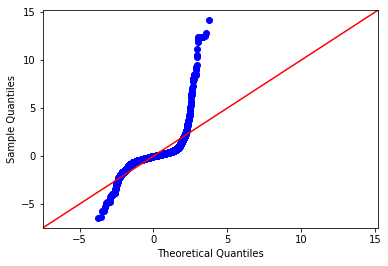

In [53]:
# Your code here
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
#Your code here


> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
#Your code here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 